In [1]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML libraries
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
df=pd.read_csv("balance-scale.csv")
df

,%class name,left-weight,left-distance,right-weight,right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [3]:
df.head()

,%class name,left-weight,left-distance,right-weight,right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
%class name       625 non-null object
left-weight       625 non-null int64
left-distance     625 non-null int64
right-weight      625 non-null int64
right-distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


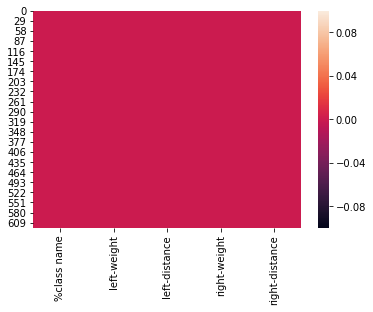

In [9]:
sns.heatmap(df.isnull())

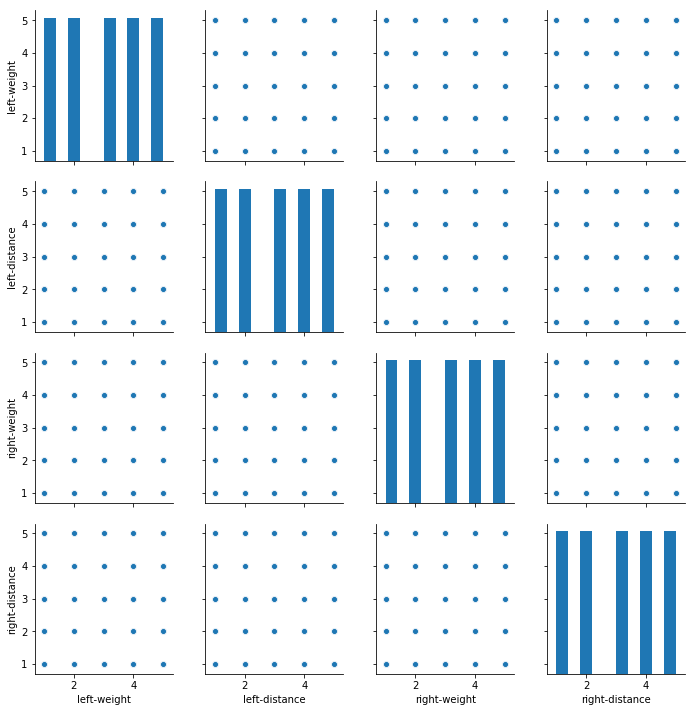

In [11]:
import seaborn as sns
sns.pairplot(df)

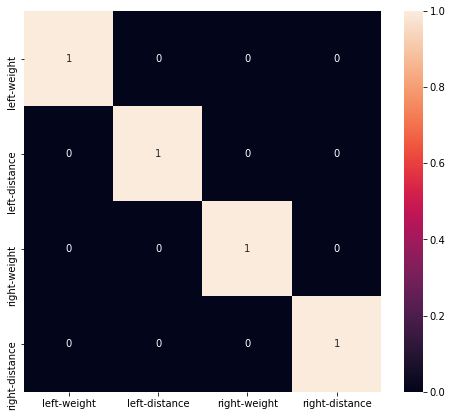

In [12]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [13]:
df.shape

(625, 5)

In [18]:
#Dividing X and y
y = df[['%class name']]
X = df.drop(['%class name'], axis = 1)

print(y.head())
print(X.head())

  %class name
0           B
1           R
2           R
3           R
4           R
   left-weight  left-distance  right-weight  right-distance
0            1              1             1               1
1            1              1             1               2
2            1              1             1               3
3            1              1             1               4
4            1              1             1               5


In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

In [20]:
#Classification and prediction
#ExtraTreeClassifier

clf = ExtraTreesClassifier(n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  80.0


In [21]:
#Classification and prediction
#XGBoost

clf = XGBClassifier(learning_rate=0.5, n_jobs=-1, n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0


In [22]:
#Classification and prediction
#Random Forest

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  75.0


In [23]:
#Classification and prediction
#DT

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  75.0


In [24]:
#Classification and prediction
#SVM

clf = SVC()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


In [25]:
#Classification and prediction
#KNN

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  90.0


Result : Accuracy score of each classifier in percentage

Extra Tree Classifier : 80
Xgboost Classifier : 95
Random Forest Classifier : 75
Decision Tree Classifier : 75
Support Vector Machine : 90
K-Nearest Neighbor : 90
Conclusion : XGBoost Classifier, SVM, and KNN have best accuracy with 95%

Note : Accuracy will variate at each run of kernel